In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [48]:
!pip install hmmlearn


In [0]:
import os
import sys
import time
import numpy as np
import librosa 
import librosa.display
import itertools
from collections import Counter
import collections

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')
import tensorflow as tf
import seaborn as sns
from itertools import chain
import keras.backend as K

from keras.datasets import mnist

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Flatten, add, Reshape
from keras.layers import Conv1D, Conv2D, Dense, Activation, LeakyReLU
from keras.layers import Dropout, BatchNormalization, MaxPooling2D, MaxPooling1D, AveragePooling2D, LSTM
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.constraints import nonneg
from keras.models import load_model



# Load 10 genre

In [51]:
train_10 = np.load('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/msd-10-genre-train.npz')
val_10 = np.load('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/msd-10-genre-valid.npz')
num_classes = train_10['label_map'].shape[0]


X_train = train_10['inputs']
Y_train = train_10['targets']
X_test = val_10['inputs']
Y_test = val_10['targets']


X_train_mean = train_10['mean']
X_train_std = train_10['std']
X_train_std.shape



(120, 25)

In [5]:
print(train_10['label_map'])
print(X_train)


[b'rap' b'rock' b'rnb' b'electronic' b'metal' b'blues' b'pop' b'jazz'
 b'country' b'reggae']
[[[-0.08655 -1.191   -0.5464  ...  1.846   -0.615   -0.2074 ]
  [-0.336   -2.11    -1.594   ...  0.835    1.001   -0.5483 ]
  [ 0.0683  -1.456   -0.697   ...  1.591   -0.09595 -0.825  ]
  ...
  [ 0.972   -0.1576  -0.4114  ...  1.034    0.822    0.928  ]
  [ 1.332    0.03525 -0.7476  ...  1.884    0.676    1.265  ]
  [ 0.951   -0.1024  -1.071   ...  0.148   -0.2754   0.7993 ]]

 [[ 1.073    0.783   -0.185   ... -0.812   -0.592    1.165  ]
  [ 1.008    0.04364  0.9116  ... -1.013   -1.004    0.738  ]
  [ 1.1875   0.73     0.3843  ... -0.566    2.232    1.019  ]
  ...
  [-0.3186  -0.692   -0.956   ... -0.918    0.02951 -1.192  ]
  [-0.3289  -1.038   -0.9604  ... -0.6016   0.7964  -1.309  ]
  [-0.1017  -0.926   -0.1724  ... -0.6724   0.5684  -0.8887 ]]

 [[ 1.046    1.335   -0.2637  ...  1.624    0.1775   1.142  ]
  [ 1.057    1.021    0.02335 ...  0.417   -0.01323  1.123  ]
  [ 1.141    1.358   -0

In [52]:
class_name = train_10['label_map']
label_name =np.array([x.decode() for x in class_name])
print(label_name)
z = label_name[0]
z

['rap' 'rock' 'rnb' 'electronic' 'metal' 'blues' 'pop' 'jazz' 'country'
 'reggae']


'rap'

# Load 25 genre

In [20]:
train_25 = np.load('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/msd-25-genre-train.npz')
val_25 = np.load('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/msd-25-genre-valid.npz')
test_25 = np.load('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/msd-25-genre-test.npz')

num_classes_25 = train_25['label_map'].shape[0]


X_train_25 = train_25['inputs']
Y_train_25 = train_25['targets']
X_val_25 = val_25['inputs']
Y_val_25 = val_25['targets']
X_test_25= test_25['inputs']
Y_test_25= test_25['targets']


print(train_25['label_map'])
print(X_train_25.shape)
print(X_val_25.shape)
print(X_test_25.shape)





[b'big band' b'blues contemporary' b'country traditional' b'dance'
 b'electronica' b'experimental' b'folk international' b'gospel'
 b'grunge emo' b'hip hop rap' b'jazz classic' b'metal alternative'
 b'metal death' b'metal heavy' b'pop contemporary' b'pop indie'
 b'pop latin' b'punk' b'reggae' b'rnb soul' b'rock alternative'
 b'rock college' b'rock contemporary' b'rock hard' b'rock neo psychedelia']
(40000, 120, 25)
(10000, 120, 25)
(10000, 120, 25)


In [22]:
class_name = train_25['label_map']
label_name =np.array([x.decode() for x in class_name])
print(label_name)


['big band' 'blues contemporary' 'country traditional' 'dance'
 'electronica' 'experimental' 'folk international' 'gospel' 'grunge emo'
 'hip hop rap' 'jazz classic' 'metal alternative' 'metal death'
 'metal heavy' 'pop contemporary' 'pop indie' 'pop latin' 'punk' 'reggae'
 'rnb soul' 'rock alternative' 'rock college' 'rock contemporary'
 'rock hard' 'rock neo psychedelia']


# Random Classification: Randomly pick a class where each class is equally likely

In [0]:
y_pred = np.random.randint(0,10, size = Y_test.shape[0])


In [0]:
acc_rand = accuracy_score(Y_test, y_pred)*100
print('Accuracy of random classification: %0.2f%%' % acc_rand)


Accuracy of random classification: 10.32%


# Train-val split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.10)


# Gaussian Mixture Model: using all the features

In [0]:
x_train = np.zeros((X_train.shape[0], X_train.shape[2]))
x_val = np.zeros((X_val.shape[0], X_val.shape[2]))


# for i in range(0, X_train.shape[0]):
#   x_train[i,:] = np.mean((np.multiply(X_train[i,:,:],X_train_std) + X_train_mean),axis=0)

# for i in range(0, X_val.shape[0]):
#   x_val[i,:] = np.mean((np.multiply(X_val[i,:,:],X_train_std) + X_train_mean),axis=0)

for i in range(0, X_train.shape[0]):
  x_train[i,:] = np.mean(X_train[i,:,:],axis=0)

for i in range(0, X_val.shape[0]):
  x_val[i,:] = np.mean(X_val[i,:,:],axis=0)
  
print(x_train[0])
print(x_val.shape)


[ 0.33618164  0.96240234 -0.95458984 -0.56542969  0.93017578  0.06854248
 -0.54003906  0.30029297  0.10516357  0.11248779 -0.31201172  0.64013672
  0.2722168   0.16430664 -0.05636597  0.140625    0.43505859  0.45336914
  0.91748047  0.77783203  0.80908203  0.76855469  0.59179688  0.40576172
  0.2388916 ]
(4000, 25)


In [0]:
mixtures = [GMM(n_components = 5, covariance_type = 'full') for k in range(num_classes)]
for k, mix in enumerate(mixtures):
  if any(y_train==k):
    mix.fit(x_train[y_train==k])
    
ll = np.zeros((x_val.shape[0], num_classes))

for i in range(0, x_val.shape[0]):
  for k, mix in enumerate(mixtures):

    ll[i,k] = mix.score(x_val[i,:].reshape(1,-1))

In [0]:
ypred = np.argmax(ll, axis=1)
acc_gmm = accuracy_score(y_val, ypred)*100
print('Accuracy of random classification: %0.2f%%' % acc_gmm)

Accuracy of random classification: 51.60%


# Gaussian Mixture Model: using only timbre data

In [0]:
x_train = np.zeros((X_train.shape[0], 12))
x_val = np.zeros((X_val.shape[0], 12))

for i in range(0, X_train.shape[0]):
  x_train[i,:] = np.mean(X_train[i,:,0:12],axis=0)

for i in range(0, X_val.shape[0]):
  x_val[i,:] = np.mean(X_val[i,:,0:12],axis=0)
  
print(x_train[0])
print(x_val.shape)



[ 0.33618164  0.96240234 -0.95458984 -0.56542969  0.93017578  0.06854248
 -0.54003906  0.30029297  0.10516357  0.11248779 -0.31201172  0.64013672]
(4000, 12)


In [0]:
mixtures = [GMM(n_components = 5, covariance_type = 'full') for k in range(num_classes)]
for k, mix in enumerate(mixtures):
  if any(y_train==k):
    mix.fit(x_train[y_train==k])
    
ll = np.zeros((x_val.shape[0], num_classes))

for i in range(0, x_val.shape[0]):
  for k, mix in enumerate(mixtures):

    ll[i,k] = mix.score(x_val[i,:].reshape(1,-1))

In [0]:
ypred = np.argmax(ll, axis=1)
acc_gmm_tim = accuracy_score(y_val, ypred)*100
print('Accuracy of random classification: %0.2f%%' % acc_gmm_tim)

Accuracy of random classification: 47.35%


# Hidden Markov Model for timbre data: DOESN'T WORK YET


In [0]:
X_train_timbre = np.copy(X_train[:,:, 0:12])
X_val_timbre = np.copy(X_val[:,:, 0:12])
x_train = np.zeros((X_train_timbre.shape[0], X_train_timbre.shape[2]+1))
x_val = np.zeros((X_val_timbre.shape[0], X_val_timbre.shape[2]+1))
x_train.shape


(36000, 13)

In [0]:
for i in range(0, X_train_timbre.shape[0]):
  x_train[i, 0:12] = np.argmax(X_train_timbre[i,:,:], axis=0)
  
for i in range(0, X_val_timbre.shape[0]):
  x_val[i, 0:12] = np.argmax(X_val_timbre[i,:,:], axis=0)
  
  
print(x_train.shape)

(36000, 13)


In [0]:
mixtures = [hmm.GaussianHMM(n_components = 6, init_params='s') for k in range(num_classes)]
for k, mix in enumerate(mixtures):
  if any(y_train==k):
    mix.startprob_ = np.array([1/6, 1/6,1/6,1/6,1/6,1/6])
    mix.fit(x_train[y_train==k])
    
ll = np.zeros((x_val.shape[0], num_classes))

for i in range(0, x_val.shape[0]):
  for k, mix in enumerate(mixtures):

    ll[i,k] = mix.score(x_val[i,:].reshape(1,-1))

In [0]:
ypred = np.argmax(ll, axis=1)
acc_hmm= accuracy_score(y_val, ypred)*100
print('Accuracy of random classification: %0.2f%%' % acc_hmm)


Accuracy of random classification: 8.95%


# Simple 2 layer NN

In [106]:
X_train_rs = X_train[:,:,24:25]
print(X_train_rs.shape)
X_val_rs = X_val[:,:,24:25]
print(X_val_rs.shape)


(36000, 120, 1)
(4000, 120, 1)
(120, 25)


In [121]:
model_name = 'nn_loud.h5'
input_shape = X_train_rs.shape[1:]

x_in = Input(shape=input_shape)

x = Dense(100)(x_in)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Dense(100)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(num_classes)(x)
x = Activation('softmax')(x)

model = Model(inputs=x_in, outputs=x)

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 120, 1)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 120, 100)          200       
_________________________________________________________________
activation_27 (Activation)   (None, 120, 100)          0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 120, 100)          400       
_________________________________________________________________
dense_37 (Dense)             (None, 120, 100)          10100     
_________________________________________________________________
activation_28 (Activation)   (None, 120, 100)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 120, 100)          400       
__________

In [123]:

checkpointer_nn = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/nn_loud.hdf5', verbose=1, save_best_only=True)

history_nn = model.fit(X_train_rs.astype(float),y_train.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_rs.astype(float), y_val.astype(float)), callbacks=[checkpointer_nn])


Train on 36000 samples, validate on 4000 samples
Epoch 1/20
36000/36000 [==============================] - 9s 237us/step - loss: 2.7844 - acc: 0.1705 - val_loss: 2.8199 - val_acc: 0.1513

Epoch 00001: val_loss improved from inf to 2.81987, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/nn_loud.hdf5
Epoch 2/20
36000/36000 [==============================] - 5s 135us/step - loss: 2.5013 - acc: 0.1813 - val_loss: 2.5324 - val_acc: 0.1790

Epoch 00002: val_loss improved from 2.81987 to 2.53244, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/nn_loud.hdf5
Epoch 3/20
36000/36000 [==============================] - 5s 133us/step - loss: 2.3610 - acc: 0.1908 - val_loss: 2.2716 - val_acc: 0.1528

Epoch 00003: val_loss improved from 2.53244 to 2.27160, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/nn_loud.hdf5
Epoch 4/20
36000/36000 [==============================] - 5s 132us/step - loss: 2.1856 - acc: 

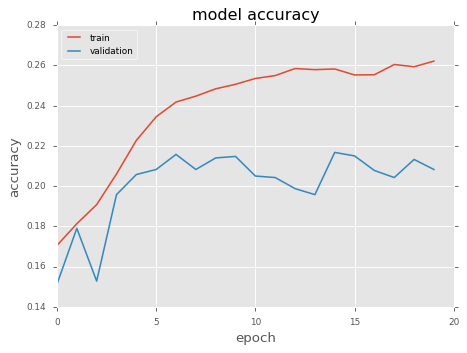

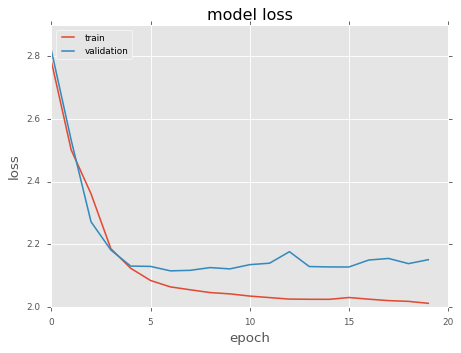

In [125]:
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# CNN-all features-10genre

In [0]:

X_train_cnn = np.expand_dims(X_train, axis=3)
X_val_cnn = np.expand_dims(X_val, axis=3)

In [90]:

def build_model(X,Y,nb_classes):
    nb_filters = 256 
    pool_size = (4, 4)  
    kernel_size = (2, 2) 
    nb_layers = 3
    input_shape = (X_train.shape[1], X_train.shape[2],1)

    model = Sequential()
    model.add(Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid'))
    

    for layer in range(nb_layers-1):
        model.add(Conv2D(nb_filters, kernel_size=kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=pool_size))
        model.add(Dropout(0.25))
        model.add(BatchNormalization())
        
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes,activation='softmax'))
    return model

model = build_model(X_train_cnn.astype(float),y_train.astype(float),num_classes)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 119, 24, 256)      1280      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 118, 23, 256)      262400    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 5, 256)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 29, 5, 256)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 5, 256)        1024      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 4, 256)        262400    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 1, 256)         0         
__________

In [91]:
checkpointer_cnn = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_2d.hdf5', verbose=1, save_best_only=True)

history_cnn = model.fit(X_train_cnn.astype(float),y_train.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_cnn.astype(float), y_val.astype(float)), callbacks=[checkpointer_cnn])


Train on 36000 samples, validate on 4000 samples
Epoch 1/20
36000/36000 [==============================] - 126s 3ms/step - loss: 1.8917 - acc: 0.3203 - val_loss: 1.6446 - val_acc: 0.4132

Epoch 00001: val_loss improved from inf to 1.64462, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_2d.hdf5
Epoch 2/20
36000/36000 [==============================] - 122s 3ms/step - loss: 1.6005 - acc: 0.4265 - val_loss: 1.5473 - val_acc: 0.4563

Epoch 00002: val_loss improved from 1.64462 to 1.54729, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_2d.hdf5
Epoch 3/20
36000/36000 [==============================] - 121s 3ms/step - loss: 1.4824 - acc: 0.4789 - val_loss: 1.4819 - val_acc: 0.4715

Epoch 00003: val_loss improved from 1.54729 to 1.48190, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_2d.hdf5
Epoch 4/20
36000/36000 [==============================] - 121s 3ms/step - loss: 1.400

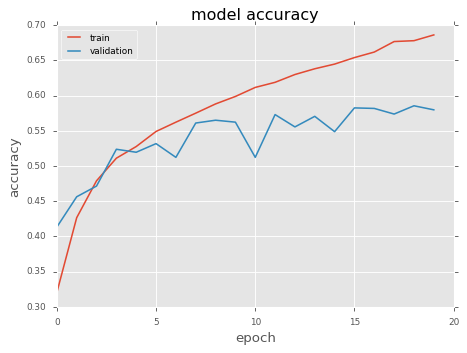

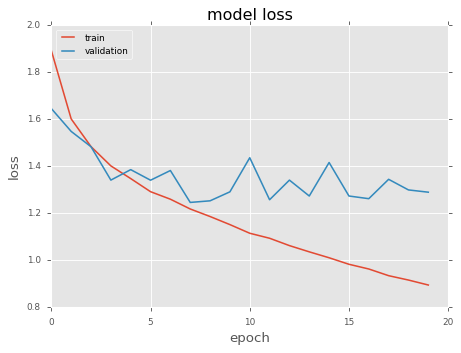

In [92]:
# "Accuracy"
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:

model_crnn = load_model('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_2d.hdf5')

In [95]:
X_test_cnn = np.expand_dims(X_test, axis=3)
loss, accuracy = model_crnn.evaluate(X_test_cnn, Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

10000/10000 [==============================] - 14s 1ms/step
Accuracy: 56.080000


In [96]:
y_pred = model_crnn.predict(X_test_cnn)
y_pred_1=np.argmax(y_pred, axis=1)  

labels = class_name

cm = confusion_matrix(Y_test, y_pred_1,labels =[0,1,2,3,4,5,6,7,8,9])
print(cm)

[[691   8 112  57   9   4  55   3   3  58]
 [ 15 322  57  92 181  46 113  15 143  16]
 [ 30  21 604  27   3  24 134  27  95  35]
 [ 28  42  59 678  40   2 111  17   5  18]
 [  2 102   3  49 808   4  21   2   8   1]
 [  8  93 148   9  15 385  35 121 167  19]
 [ 21 101 162  67  16   5 432   9 176  11]
 [ 14  19 236  83   8  90  44 440  53  13]
 [  6  65  33  15   2  46 108  22 690  13]
 [ 75  60 110  52  15  13  57   6  54 558]]


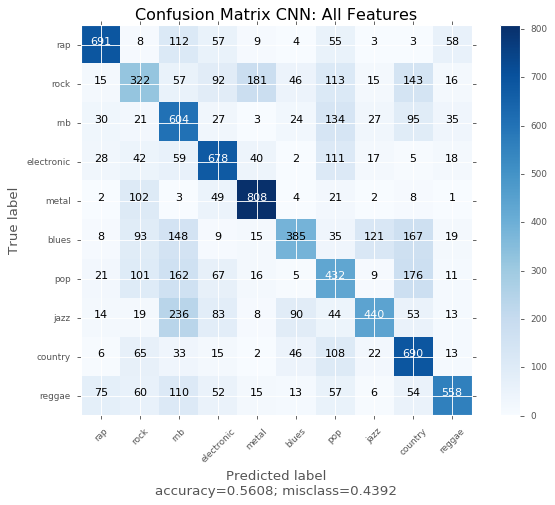

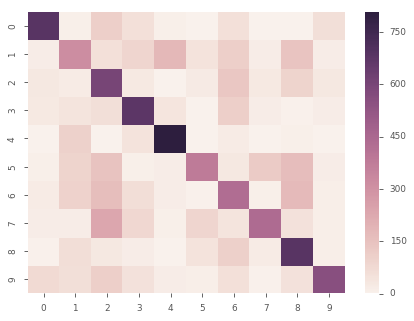

In [103]:
plot_confusion_matrix(cm,normalize = False,target_names = label_name,title = "Confusion Matrix CNN: All Features")
sns.heatmap(cm)

# CNN-all features-25genre

In [23]:
X_train_25cnn = np.expand_dims(X_train_25, axis=3)
X_val_25cnn = np.expand_dims(X_val_25, axis=3)

def build_model(X,Y,nb_classes):
    nb_filters = 64  
    pool_size = (4, 4)  
    kernel_size = (2, 2) 
    nb_layers = 3
    input_shape = (X_train.shape[1], X_train.shape[2],1)

    model = Sequential()
    model.add(Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid'))
    

    for layer in range(nb_layers-1):
        model.add(Conv2D(nb_filters, kernel_size=kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=pool_size))
        model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes,activation='softmax'))
    return model

model = build_model(X_train_25cnn.astype(float),Y_train_25.astype(float),num_classes_25)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 119, 24, 64)       320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 23, 64)       16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 5, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 5, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 4, 64)         16448     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [25]:
checkpointer_cnn = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_25.hdf5', verbose=1, save_best_only=True)

history_cnn = model.fit(X_train_25cnn.astype(float),Y_train_25.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_25cnn.astype(float), Y_val_25.astype(float)), callbacks=[checkpointer_cnn])


Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 25s 633us/step - loss: 3.0833 - acc: 0.0762 - val_loss: 2.8572 - val_acc: 0.1319

Epoch 00001: val_loss improved from inf to 2.85720, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_25.hdf5
Epoch 2/20
40000/40000 [==============================] - 20s 506us/step - loss: 2.8391 - acc: 0.1336 - val_loss: 2.7508 - val_acc: 0.1666

Epoch 00002: val_loss improved from 2.85720 to 2.75079, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_25.hdf5
Epoch 3/20
40000/40000 [==============================] - 20s 505us/step - loss: 2.7598 - acc: 0.1547 - val_loss: 2.6956 - val_acc: 0.1771

Epoch 00003: val_loss improved from 2.75079 to 2.69564, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/cnn_all_25.hdf5
Epoch 4/20
40000/40000 [=========

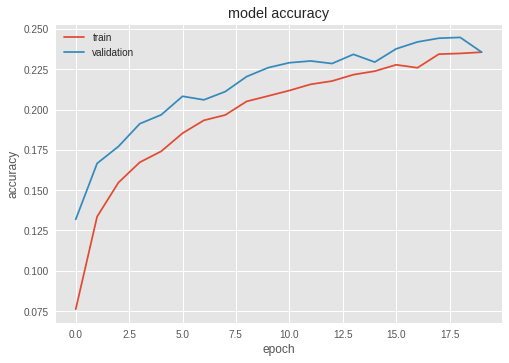

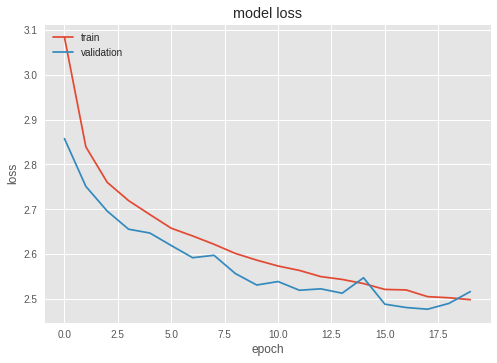

In [26]:
# "Accuracy"
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# CRNN_all features_10genre

In [49]:
# CRNN for all #


nb_filters = 256  
pool_size = (2, 2)  
kernel_size = (2, 2) 
nb_layers = 3
input_shape = (X_train.shape[1], X_train.shape[2],1)
    
print(input_shape)    
x_in = Input(shape =input_shape )
x = Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid')(x_in)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
    
x_shape = x.get_shape()
 
x = Reshape(target_shape = (int(x_shape[1]),int(x_shape[2] * x_shape[3])))(x)
print(x.get_shape())

x = Dense(64, activation='relu')(x)
    
rnn_1= LSTM(128, kernel_initializer="he_normal", return_sequences=True)(x)
rnn_1b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(x)
    
rnn1_merged = add([rnn_1, rnn_1b])

rnn_2 = LSTM(128, kernel_initializer="he_normal", return_sequences=True)(rnn1_merged)
rnn_2b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(rnn1_merged)
    
rnn2_merged = add([rnn_2, rnn_2b])

rnn2_merged = Dropout(0.25)(rnn2_merged)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(num_classes,activation='softmax')(x)

    

model_crnn = Model(inputs = x_in, outputs = x)
model_crnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_crnn.summary()


(120, 25, 1)
(?, 14, 512)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 120, 25, 1)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 119, 24, 256)      1280      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 118, 23, 256)      262400    
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 59, 11, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 59, 11, 256)       1024      
_________________________________________________________________
dropout_68 (Dropout)         (None, 59, 11, 256)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 58, 10, 256)  

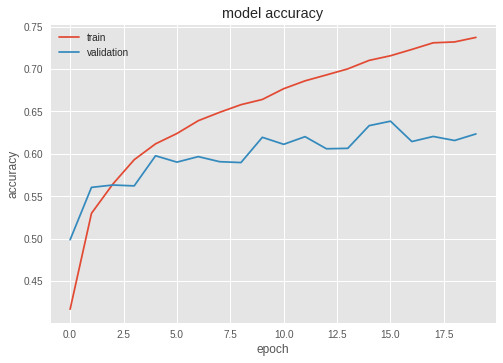

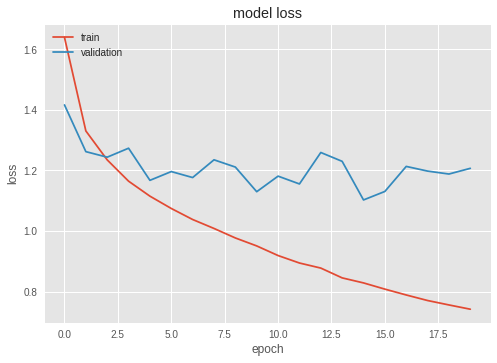

In [53]:
# "Accuracy"
plt.plot(history_crnn.history['acc'])
plt.plot(history_crnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history_crnn.history['loss'])
plt.plot(history_crnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
checkpointer_crnn = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_2d_v2.hdf5', verbose=1, save_best_only=True)

history_crnn = model_crnn.fit(X_train_cnn.astype(float),y_train.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_cnn.astype(float), y_val.astype(float)), callbacks=[checkpointer_crnn])


Train on 36000 samples, validate on 4000 samples
Epoch 1/20
36000/36000 [==============================] - 148s 4ms/step - loss: 1.6389 - acc: 0.4169 - val_loss: 1.4160 - val_acc: 0.4987

Epoch 00001: val_loss improved from inf to 1.41604, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_2d_v2.hdf5
Epoch 2/20
36000/36000 [==============================] - 143s 4ms/step - loss: 1.3302 - acc: 0.5299 - val_loss: 1.2618 - val_acc: 0.5605

Epoch 00002: val_loss improved from 1.41604 to 1.26180, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_2d_v2.hdf5
Epoch 3/20
36000/36000 [==============================] - 143s 4ms/step - loss: 1.2346 - acc: 0.5644 - val_loss: 1.2435 - val_acc: 0.5633

Epoch 00003: val_loss improved from 1.26180 to 1.24351, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_2d_v2.hdf5
Epoch 4/20
36000/36000 [==============================] - 143s 4ms/step -

In [0]:
model_crnn = load_model('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_2d_v2.hdf5')

In [16]:
X_test_cnn = np.expand_dims(X_test, axis=3)
loss, accuracy = model_crnn.evaluate(X_test_cnn, Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))


10000/10000 [==============================] - 15s 2ms/step
Accuracy: 64.470000


In [127]:
y_pred = model_crnn.predict(X_test_cnn)
y_pred_1=np.argmax(y_pred, axis=1)  

labels = class_name

cm = confusion_matrix(Y_test, y_pred_1,labels =[0,1,2,3,4,5,6,7,8,9])
print(cm)

[[830  12  23  50   5   3   3  12   2  60]
 [ 17 473  18  93  96  58  79  43  81  42]
 [ 81  25 470  39   1  57  93 105  55  74]
 [ 48  51   5 762  16   6  44  45   2  21]
 [  5 156   0  45 757   4  17   9   2   5]
 [ 11  68  48  10   3 583  11 148  93  25]
 [ 43 156  93  94   8   7 420  61  93  25]
 [  8  17  44  72   5  59  27 731  16  21]
 [  3  85  15  12   0  48  70  44 708  15]
 [ 90  37  24  45   6  13  24  21  27 713]]


In [0]:
mpl.style.use('seaborn-paper')
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", 
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    plt.show()

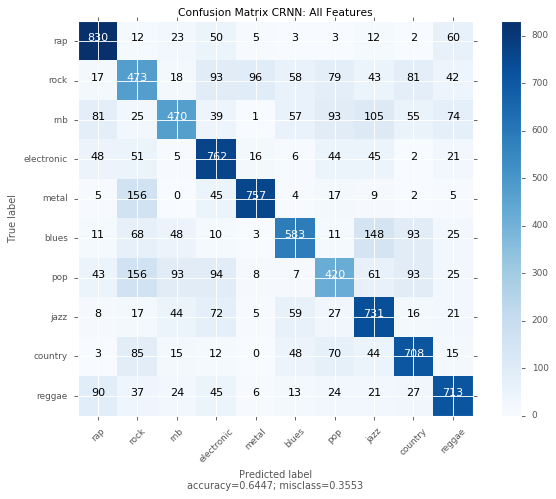

In [43]:
plot_confusion_matrix(cm,normalize = False,target_names = label_name,title = "Confusion Matrix CRNN: All Features"

In [132]:
def Metrics(preds, labs, show=True):
  """Print precision, recall and F1 for each class.
  Assumes a single language per example, i.e. no code switching.
  Args:
    preds: list of predictions
    labs: list of labels
    show: flag to toggle printing
  """
  all_langs = set(preds + labs)
  preds = np.array(preds)
  labs = np.array(labs)
  label_totals = collections.Counter(labs)
  pred_totals = collections.Counter(preds)
  confusion_matrix = collections.Counter(zip(preds, labs))
  num_correct = 0
  for lang in all_langs:
    num_correct += confusion_matrix[(lang, lang)]
  acc = num_correct / float(len(preds))
  print('accuracy = {0:.3f}'.format(acc))
  if show:
    print(' Class     Prec.   Rec.   F1')
    print('------------------------------')
  scores = []
  fmt_str = '  {0:6}  {1:6.2f} {2:6.2f} {3:6.2f}'
  for lang in sorted(all_langs):
    idx = preds == lang
    total = max(1.0, pred_totals[lang])
    precision = 100.0 * confusion_matrix[(lang, lang)] / total
    idx = labs == lang
    total = max(1.0, label_totals[lang])
    recall = 100.0 * confusion_matrix[(lang, lang)] / total
    if precision + recall == 0.0:
      f1 = 0.0
    else:
      f1 = 2.0 * precision * recall / (precision + recall)
    scores.append([precision, recall, f1])
    if show:
      print(fmt_str.format(lang, precision, recall, f1))
  totals = np.array(scores).mean(axis=0)
  if show:
    print('------------------------------')
    print(fmt_str.format('Total:', totals[0], totals[1], totals[2]))
  return totals[2]


class MovingAvg(object):
  
  def __init__(self, p):
    self.val = None
    self.p = p

  def Update(self, v):
    if self.val is None:
      self.val = v
      return v
    self.val = self.p * self.val + (1.0 - self.p) * v
    return self.val

  
Metrics(y_pred_1,Y_test,'True')      

accuracy = 0.645
 Class     Prec.   Rec.   F1
------------------------------
       0   73.06  83.00  77.72
       1   43.80  47.30  45.48
       2   63.51  47.00  54.02
       3   62.36  76.20  68.59
       4   84.39  75.70  79.81
       5   69.57  58.30  63.44
       6   53.30  42.00  46.98
       7   59.97  73.10  65.89
       8   65.62  70.80  68.11
       9   71.23  71.30  71.26
      10    0.00   0.00   0.00
      11    0.00   0.00   0.00
      12    0.00   0.00   0.00
      13    0.00   0.00   0.00
      14    0.00   0.00   0.00
      15    0.00   0.00   0.00
      16    0.00   0.00   0.00
      17    0.00   0.00   0.00
      18    0.00   0.00   0.00
------------------------------
  Total:   34.04  33.93  33.75


33.75232393441094

# CRNN_MFCC_10genre

In [54]:
X_train_mfcc = X_train[:,:,0:12]
X_val_mfcc = X_val[:,:,0:12]
print(X_train_mfcc.shape)
print(X_train.shape)
X_train_cnn_mfcc = np.expand_dims(X_train_mfcc, axis=3)
X_val_cnn_mfcc = np.expand_dims(X_val_mfcc, axis=3)

(36000, 120, 12)
(36000, 120, 25)


In [55]:
nb_filters = 128  
pool_size = (2, 2)  
kernel_size = (2, 2) 
nb_layers = 3
input_shape = (X_train_mfcc.shape[1], X_train_mfcc.shape[2],1)
    
print(input_shape)    
x_in = Input(shape =input_shape )
x = Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid')(x_in)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)


x_shape = x.get_shape()
 
x = Reshape(target_shape = (int(x_shape[1]),int(x_shape[2] * x_shape[3])))(x)
print(x.get_shape())

x = Dense(128, activation='relu')(x)
    
rnn_1= LSTM(128, kernel_initializer="he_normal", return_sequences=True)(x)
rnn_1b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(x)
    
rnn1_merged = add([rnn_1, rnn_1b])

rnn_2 = LSTM(128, kernel_initializer="he_normal", return_sequences=True)(rnn1_merged)
rnn_2b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(rnn1_merged)
    
rnn2_merged = add([rnn_2, rnn_2b])

rnn2_merged = Dropout(0.25)(rnn2_merged)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(num_classes,activation='softmax')(x)

    

model_crnn_mfcc = Model(inputs = x_in, outputs = x)
model_crnn_mfcc.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_crnn_mfcc.summary()

(120, 12, 1)
(?, 29, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 120, 12, 1)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 119, 11, 128)      640       
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 118, 10, 128)      65664     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 59, 5, 128)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 59, 5, 128)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 58, 4, 128)        65664     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 29, 2, 128)   

In [0]:
checkpointer_crnn_mfcc = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_mfcc_2d.hdf5', verbose=1, save_best_only=True)

history_crnn_mfcc = model_crnn_mfcc.fit(X_train_cnn_mfcc.astype(float),y_train.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_cnn_mfcc.astype(float), y_val.astype(float)), callbacks=[checkpointer_crnn_mfcc])


Train on 36000 samples, validate on 4000 samples
Epoch 1/20
36000/36000 [==============================] - 28s 777us/step - loss: 1.7384 - acc: 0.3654 - val_loss: 1.5218 - val_acc: 0.4617

Epoch 00001: val_loss improved from inf to 1.52177, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_mfcc_2d.hdf5
Epoch 2/20
36000/36000 [==============================] - 25s 691us/step - loss: 1.4859 - acc: 0.4680 - val_loss: 1.4874 - val_acc: 0.4730

Epoch 00002: val_loss improved from 1.52177 to 1.48738, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_mfcc_2d.hdf5
Epoch 3/20
36000/36000 [==============================] - 25s 687us/step - loss: 1.4031 - acc: 0.4984 - val_loss: 1.4679 - val_acc: 0.4732

Epoch 00003: val_loss improved from 1.48738 to 1.46787, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_mfcc_2d.hdf5
Epoch 4/20
36000/36000 [==============================] - 25s 689us/step - l

In [133]:
model_crnn = load_model('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_mfcc_2d.hdf5')

X_test_mfcc = X_test[:,:,0:12]
X_test_cnn_mfcc = np.expand_dims(X_test_mfcc, axis=3)


loss, accuracy = model_crnn.evaluate(X_test_cnn_mfcc, Y_test, verbose=1)

print('Accuracy: %f' % (accuracy*100))
y_pred = model_crnn.predict(X_test_cnn_mfcc)
y_pred_1=np.argmax(y_pred, axis=1)  

labels = class_name

cm = confusion_matrix(Y_test, y_pred_1,labels =[0,1,2,3,4,5,6,7,8,9])
print(cm)

10000/10000 [==============================] - 4s 445us/step
Accuracy: 57.140000
[[738   7  70  51   6   6  39  18   8  57]
 [ 11 385  25  66 154 110  79  39 104  27]
 [ 76  33 431  34   0 107 129  69  78  43]
 [ 29  59  14 674  33  25  64  66  13  23]
 [  3 139   2  34 766  10  14  12  14   6]
 [  6  51  44   9  11 671  13  84  88  23]
 [ 35 132 108  92  26  44 349  50 147  17]
 [  9  14  49  66   5 164  31 586  62  14]
 [  5  84  36   6   5 135  76  45 606   2]
 [156  48  58  46  16  58  56  22  32 508]]


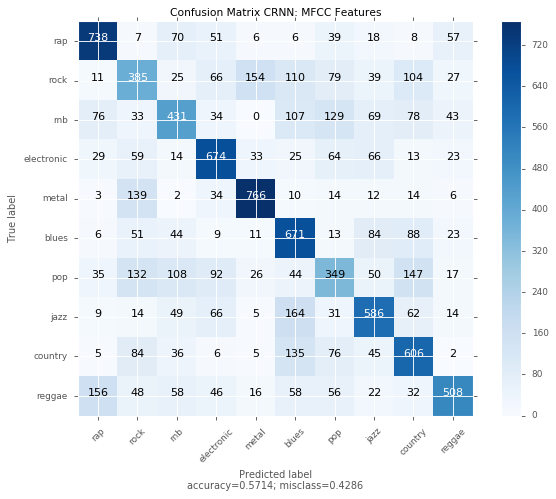

In [46]:
plot_confusion_matrix(cm,normalize = False,target_names = label_name,title = "Confusion Matrix CRNN: MFCC Features")

In [134]:
Metrics(y_pred_1,Y_test,'True')   

accuracy = 0.571
 Class     Prec.   Rec.   F1
------------------------------
       0   69.10  73.80  71.37
       1   40.44  38.50  39.45
       2   51.49  43.10  46.92
       3   62.52  67.40  64.87
       4   74.95  76.60  75.77
       5   50.45  67.10  57.60
       6   41.06  34.90  37.73
       7   59.13  58.60  58.86
       8   52.60  60.60  56.32
       9   70.56  50.80  59.07
      10    0.00   0.00   0.00
      11    0.00   0.00   0.00
      12    0.00   0.00   0.00
      13    0.00   0.00   0.00
      14    0.00   0.00   0.00
      15    0.00   0.00   0.00
      16    0.00   0.00   0.00
      17    0.00   0.00   0.00
      18    0.00   0.00   0.00
------------------------------
  Total:   30.12  30.07  29.89


29.892718707659725

# CRNN_Chroma_10genre

In [82]:
X_train_chroma = X_train[:,:,12:24]
X_val_chroma = X_val[:,:,12:24]
print(X_train_chroma.shape)
print(X_train.shape)
X_train_cnn_chroma = np.expand_dims(X_train_chroma, axis=3)
X_val_cnn_chroma = np.expand_dims(X_val_chroma, axis=3)


(36000, 120, 12)
(36000, 120, 25)


In [83]:
nb_filters = 128  
pool_size = (2, 2)  
kernel_size = (2, 2) 
nb_layers = 3
input_shape = (X_train_chroma.shape[1], X_train_chroma.shape[2],1)
    
print(input_shape)    
x_in = Input(shape =input_shape )
x = Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid')(x_in)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)


x_shape = x.get_shape()
 
x = Reshape(target_shape = (int(x_shape[1]),int(x_shape[2] * x_shape[3])))(x)
print(x.get_shape())

x = Dense(128, activation='relu')(x)
    
rnn_1= LSTM(128, kernel_initializer="he_normal", return_sequences=True)(x)
rnn_1b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(x)
    
rnn1_merged = add([rnn_1, rnn_1b])

rnn_2 = LSTM(128, kernel_initializer="he_normal", return_sequences=True)(rnn1_merged)
rnn_2b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(rnn1_merged)
    
rnn2_merged = add([rnn_2, rnn_2b])

rnn2_merged = Dropout(0.25)(rnn2_merged)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(num_classes,activation='softmax')(x)

    

model_crnn_mfcc = Model(inputs = x_in, outputs = x)
model_crnn_mfcc.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_crnn_mfcc.summary()

(120, 12, 1)
(?, 29, 256)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 120, 12, 1)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 119, 11, 128)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 10, 128)      65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 5, 128)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 59, 5, 128)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 4, 128)        65664     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 2, 128)   

In [84]:
checkpointer_crnn_chroma = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_chroma_2d.hdf5', verbose=1, save_best_only=True)

history_crnn_chroma = model_crnn_mfcc.fit(X_train_cnn_chroma.astype(float),y_train.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_cnn_chroma.astype(float), y_val.astype(float)), callbacks=[checkpointer_crnn_chroma])


Train on 36000 samples, validate on 4000 samples
Epoch 1/20
36000/36000 [==============================] - 29s 810us/step - loss: 1.9717 - acc: 0.2669 - val_loss: 1.7942 - val_acc: 0.3548

Epoch 00001: val_loss improved from inf to 1.79416, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_chroma_2d.hdf5
Epoch 2/20
36000/36000 [==============================] - 26s 729us/step - loss: 1.7177 - acc: 0.3828 - val_loss: 1.7442 - val_acc: 0.3688

Epoch 00002: val_loss improved from 1.79416 to 1.74420, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_chroma_2d.hdf5
Epoch 3/20
36000/36000 [==============================] - 26s 728us/step - loss: 1.6211 - acc: 0.4250 - val_loss: 1.5734 - val_acc: 0.4405

Epoch 00003: val_loss improved from 1.74420 to 1.57336, saving model to /content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_chroma_2d.hdf5
Epoch 4/20
36000/36000 [==============================] - 26s 726us/st

In [135]:
model_crnn_chroma = load_model('/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_chroma_2d.hdf5')

X_test_chroma = X_test[:,:,12:23]
X_test_cnn_chroma = np.expand_dims(X_test_mfcc, axis=3)


loss, accuracy = model_crnn_chroma.evaluate(X_test_cnn_mfcc, Y_test, verbose=1)

print('Accuracy: %f' % (accuracy*100))
y_pred = model_crnn.predict(X_test_cnn_mfcc)
y_pred_1=np.argmax(y_pred, axis=1)  

labels = class_name

cm = confusion_matrix(Y_test, y_pred_1,labels =[0,1,2,3,4,5,6,7,8,9])
print(cm)

10000/10000 [==============================] - 5s 463us/step
Accuracy: 9.220000
[[738   7  70  51   6   6  39  18   8  57]
 [ 11 385  25  66 154 110  79  39 104  27]
 [ 76  33 431  34   0 107 129  69  78  43]
 [ 29  59  14 674  33  25  64  66  13  23]
 [  3 139   2  34 766  10  14  12  14   6]
 [  6  51  44   9  11 671  13  84  88  23]
 [ 35 132 108  92  26  44 349  50 147  17]
 [  9  14  49  66   5 164  31 586  62  14]
 [  5  84  36   6   5 135  76  45 606   2]
 [156  48  58  46  16  58  56  22  32 508]]


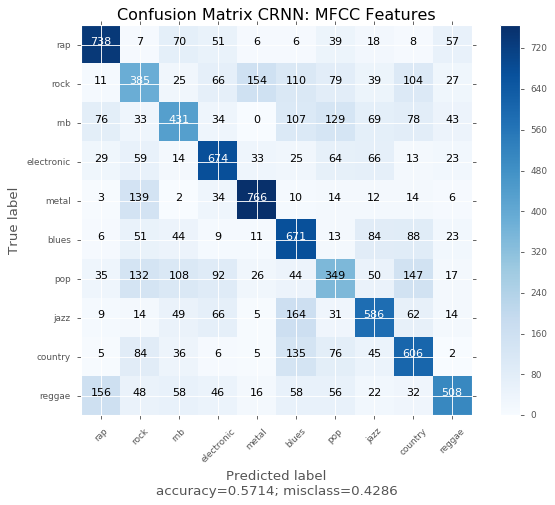

In [86]:
plot_confusion_matrix(cm,normalize = False,target_names = label_name,title = "Confusion Matrix CRNN: MFCC Features")

In [136]:
Metrics(y_pred_1,Y_test,'True')   

accuracy = 0.571
 Class     Prec.   Rec.   F1
------------------------------
       0   69.10  73.80  71.37
       1   40.44  38.50  39.45
       2   51.49  43.10  46.92
       3   62.52  67.40  64.87
       4   74.95  76.60  75.77
       5   50.45  67.10  57.60
       6   41.06  34.90  37.73
       7   59.13  58.60  58.86
       8   52.60  60.60  56.32
       9   70.56  50.80  59.07
      10    0.00   0.00   0.00
      11    0.00   0.00   0.00
      12    0.00   0.00   0.00
      13    0.00   0.00   0.00
      14    0.00   0.00   0.00
      15    0.00   0.00   0.00
      16    0.00   0.00   0.00
      17    0.00   0.00   0.00
      18    0.00   0.00   0.00
------------------------------
  Total:   30.12  30.07  29.89


29.892718707659725

# CRNN_all features_25genre

In [27]:
nb_filters = 128  
pool_size = (4, 4)  
kernel_size = (2, 2) 
nb_layers = 3
input_shape = (X_train_25.shape[1], X_train_25.shape[2],1)
    
print(input_shape)    
x_in = Input(shape =input_shape )
x = Conv2D(nb_filters, kernel_size=kernel_size,activation='relu',input_shape=input_shape,padding='valid')(x_in)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)
    
x = Conv2D(nb_filters, kernel_size=kernel_size, activation='relu')(x)
x = MaxPooling2D(pool_size=pool_size)(x)
x = Dropout(0.25)(x)
    
x_shape = x.get_shape()
 
x = Reshape(target_shape = (int(x_shape[1]),int(x_shape[2] * x_shape[3])))(x)
print(x.get_shape())

x = Dense(32, activation='relu')(x)
    
rnn_1= LSTM(128, kernel_initializer="he_normal", return_sequences=True)(x)
rnn_1b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(x)
    
rnn1_merged = add([rnn_1, rnn_1b])

rnn_2 = LSTM(128, kernel_initializer="he_normal", return_sequences=True)(rnn1_merged)
rnn_2b = LSTM(128, kernel_initializer="he_normal", go_backwards=True, return_sequences=True)(rnn1_merged)
    
rnn2_merged = add([rnn_2, rnn_2b])

rnn2_merged = Dropout(0.25)(rnn2_merged)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(num_classes,activation='softmax')(x)

    

model_crnn = Model(inputs = x_in, outputs = x)
model_crnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_crnn.summary()

(120, 25, 1)
(?, 7, 128)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 25, 1)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 119, 24, 128)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 23, 128)      65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 5, 128)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 5, 128)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 4, 128)        65664     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 1, 128)     

In [28]:
checkpointer_crnn_25 = ModelCheckpoint(filepath='/content/gdrive/My Drive/Grad Courses/EE511/Project/Music Data/crnn_all_25.hdf5', verbose=1, save_best_only=True)

history_crnn_25 = model_crnn.fit(X_train_25cnn.astype(float),Y_train_25.astype(float), batch_size=100, epochs=20, verbose=1, validation_data=(X_val_25cnn.astype(float), Y_val_25.astype(float)), callbacks=[checkpointer])


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 48s 1ms/step - loss: nan - acc: 0.0401 - val_loss: nan - val_acc: 0.0400

Epoch 00001: val_loss did not improve from 2.47663
Epoch 2/20
40000/40000 [==============================] - 46s 1ms/step - loss: nan - acc: 0.0400 - val_loss: nan - val_acc: 0.0400

Epoch 00002: val_loss did not improve from 2.47663
Epoch 3/20
40000/40000 [==============================] - 46s 1ms/step - loss: nan - acc: 0.0400 - val_loss: nan - val_acc: 0.0400

Epoch 00003: val_loss did not improve from 2.47663
Epoch 4/20
40000/40000 [==============================] - 46s 1ms/step - loss: nan - acc: 0.0400 - val_loss: nan - val_acc: 0.0400

Epoch 00004: val_loss did not improve from 2.47663
Epoch 5/20
40000/40000 [==============================] - 46s 1ms/step - loss: nan - acc: 0.0400 - val_loss: nan - val_acc: 0.0400

Epoch 00005: val_loss did not improve from 2.47663
Epoch 6/20
40000/40000 [===========

In [0]:
# "Accuracy"
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# SVM_untrained

In [31]:
X_train_knn = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_val_knn = X_val.reshape((X_val.shape[0], X_val.shape[1]*X_val.shape[2]))

lin_clf = LinearSVC(verbose=1)

lin_clf.fit(X_train_knn, y_train)

y_pred = lin_clf.predict(X_val_knn)

accuracy_score(y_val, y_pred)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.30275

# Data Visualization

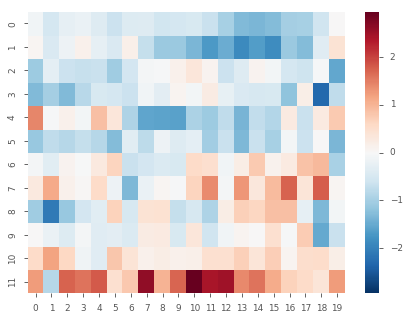

In [150]:
y = np.transpose(X_train[1,0:20,0:12])
ax = sns.heatmap(y)



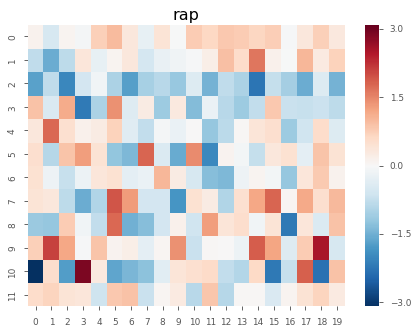

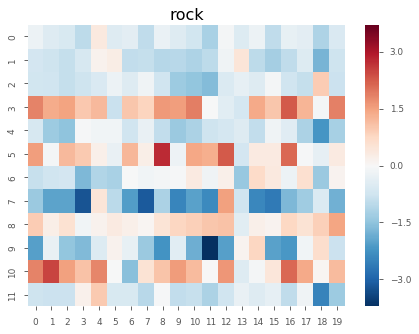

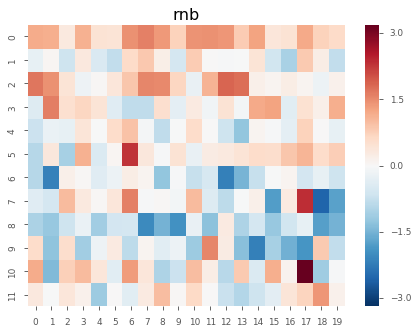

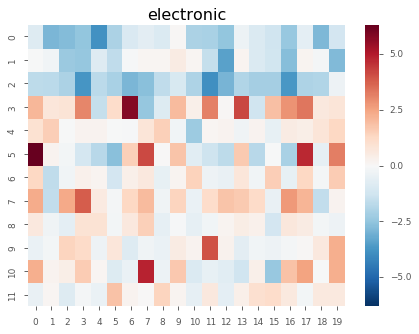

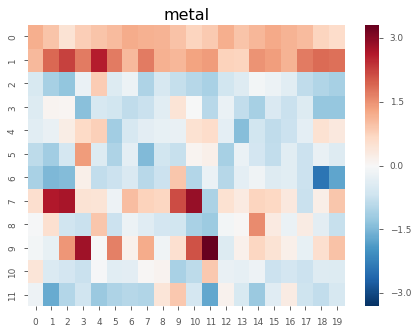

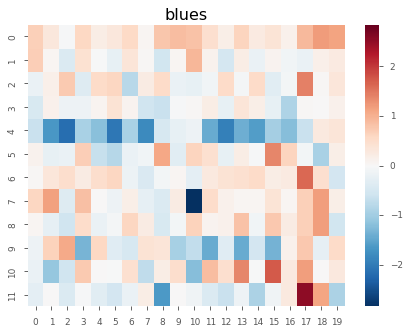

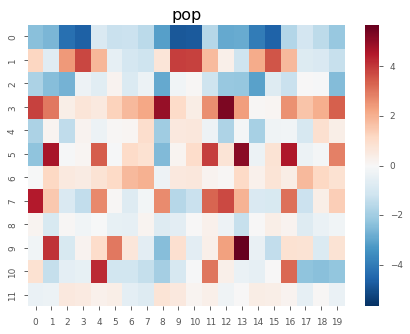

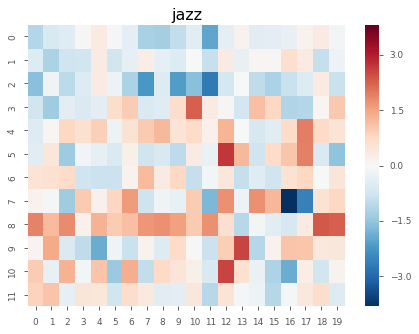

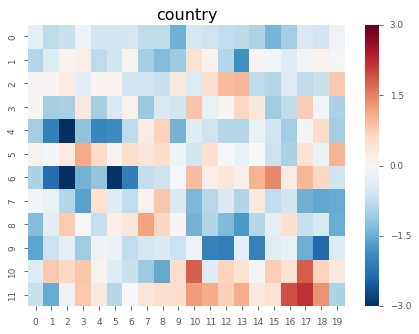

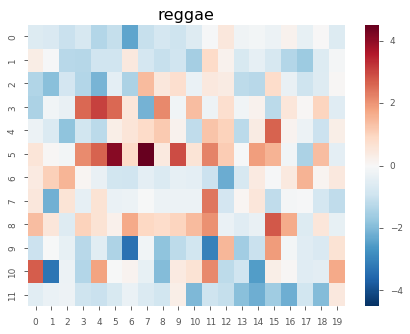

In [153]:
for y in np.unique(y_train):
  idx = np.argmax(y_train==y)
  plt.figure()
  sns.heatmap(np.transpose(X_train[idx,0:20,0:12]))
  z = label_name[y]
  plt.title(z)




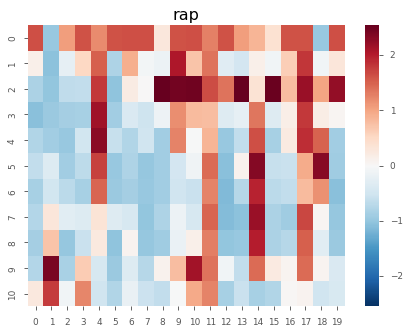

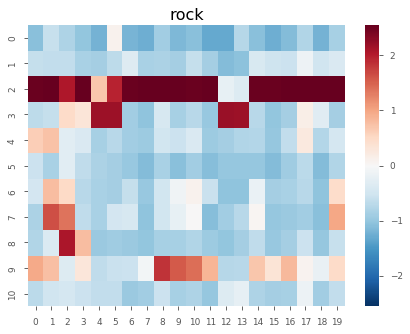

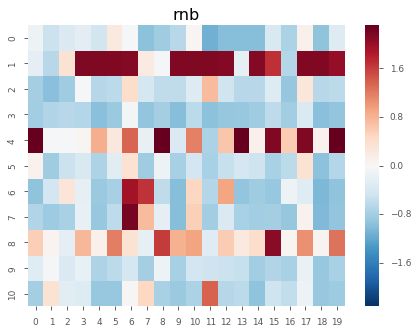

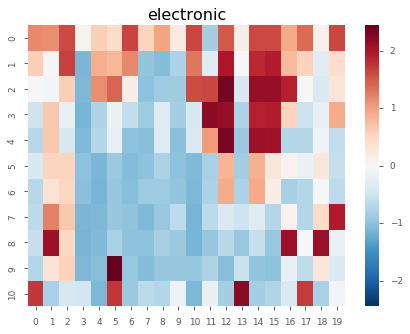

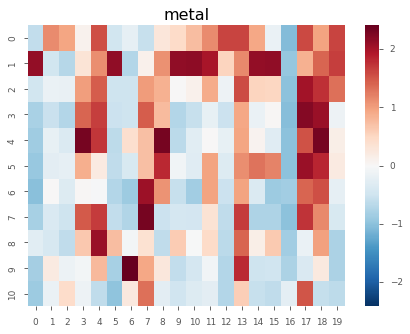

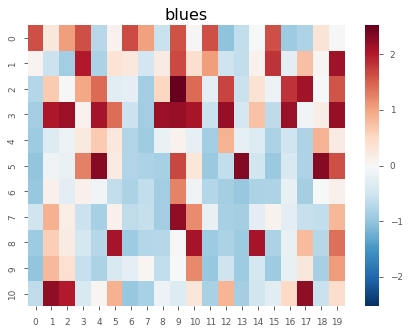

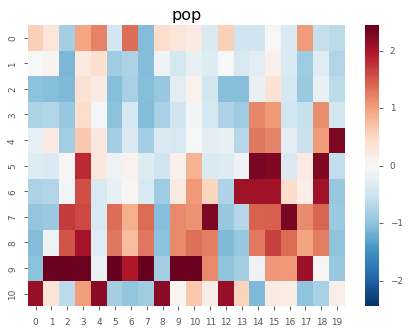

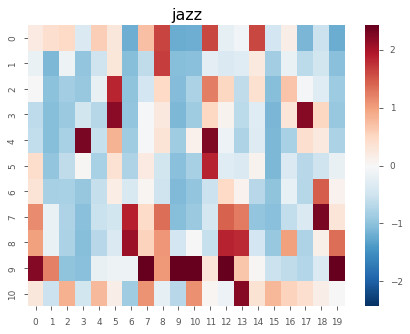

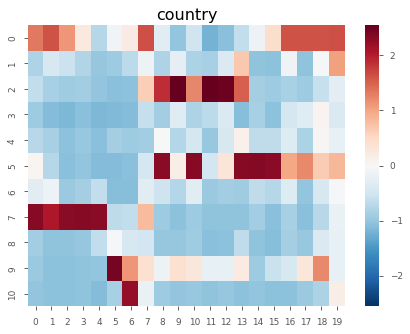

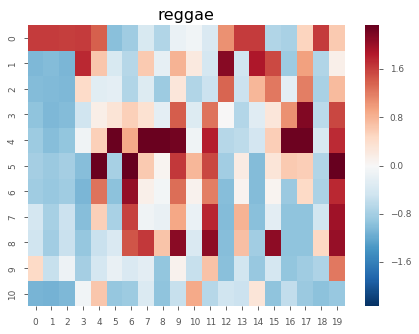

In [154]:
for y in np.unique(y_train):
  idx = np.argmax(y_train==y)
  plt.figure()
  sns.heatmap(np.transpose(X_train[idx,0:20,13:24]))
  z = label_name[y]
  plt.title(z)

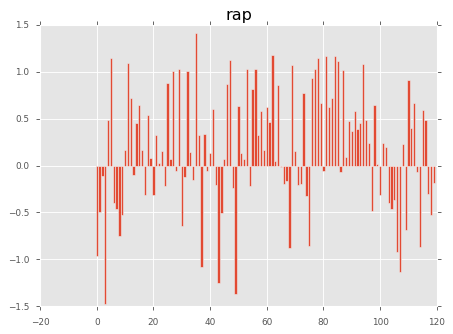

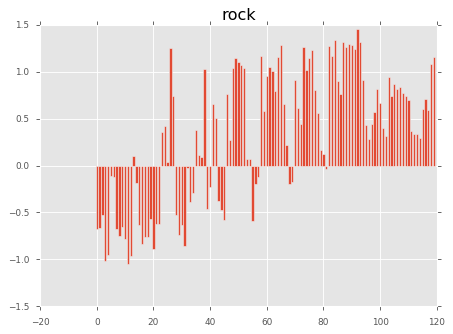

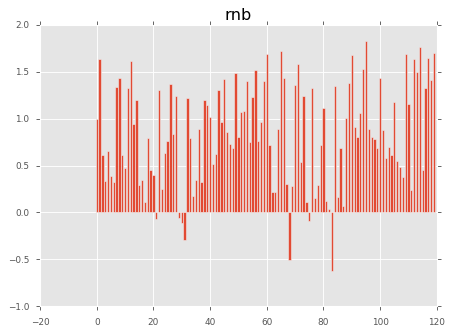

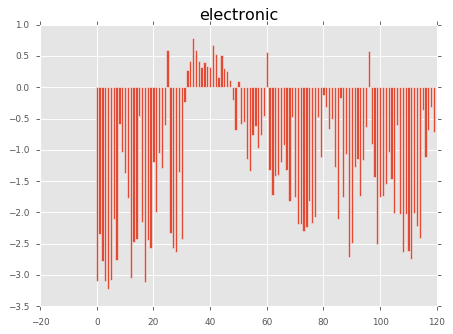

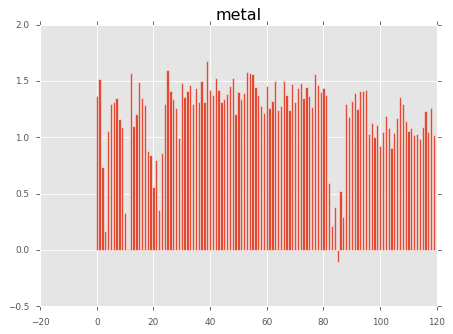

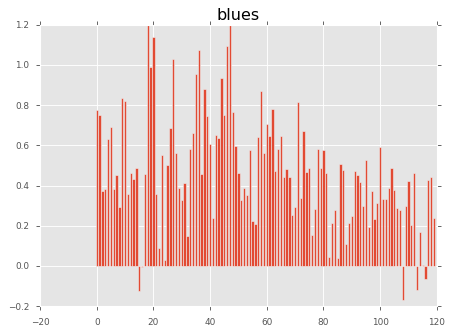

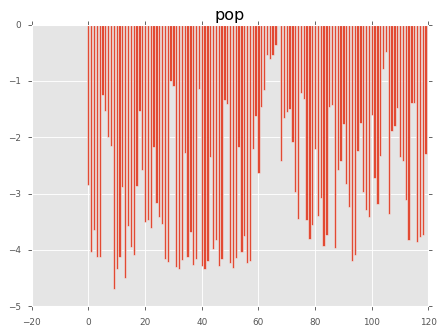

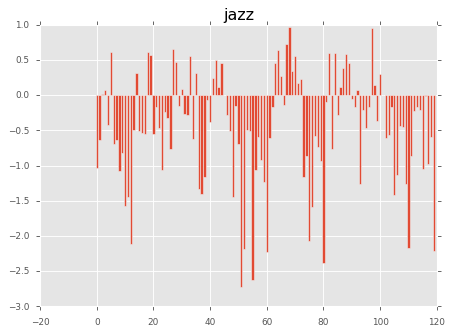

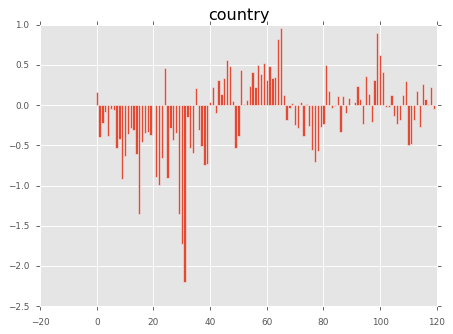

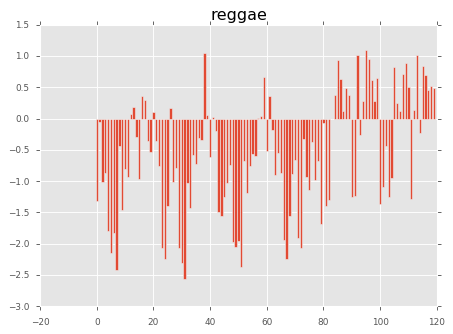

In [166]:
pos = range(120)

for y in np.unique(y_train):
  idx = np.argmax(y_train==y)
  plt.figure()
  c = X_train[idx,:,24:25]
  c = c.reshape(c.shape[0])
  plt.bar(pos,c)
  plt.title(y)
  z = label_name[y]
  plt.title(z)
 


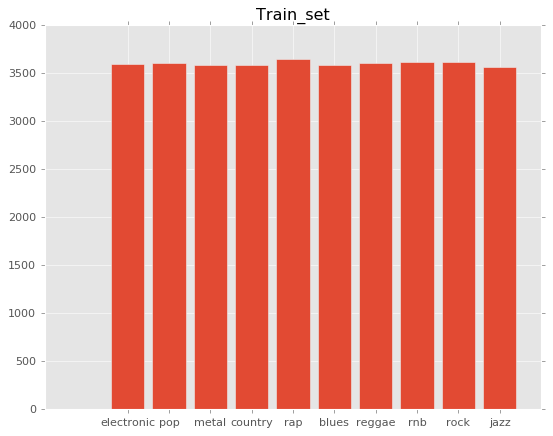

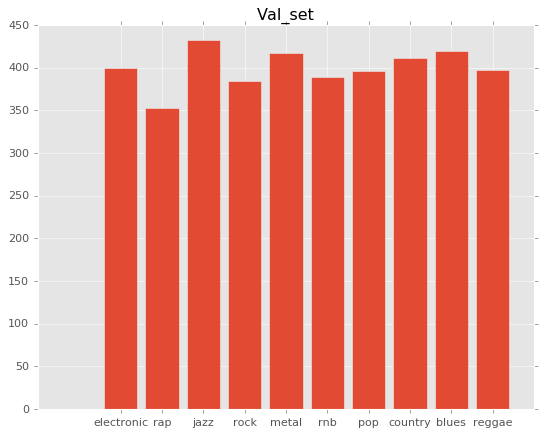

In [85]:

labels, values = zip(*Counter(y_train).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values)
i=0
x=[]
for val in labels:
  x.append(label_name[val])

plt.xticks(np.arange(num_classes), x)
plt.title('Train_set')
plt.show()



labels, values = zip(*Counter(y_val).items())
indexes = np.arange(len(labels))
plt.bar(indexes, values)
i=0
x=[]
for val in labels:
  x.append(label_name[val])

plt.xticks(np.arange(num_classes), x)
plt.title('Val_set')
plt.show()
